# Team assignment for IS833

Team 7: Jiedong Wang, Siyun Yang, Xiaoyang Yu, Minal Sariya

Poblems we tried to solve:

1. Whether there is a correlation between location and chance to get H1B sponsorship.(for example, whether employers based in Middle American cities are more willing to give H1B) )
2. What kind of positions are more likely to get H1B sponsership besides technical occupations?
3. Correlation between positions and salaries.
4. Chance of getting H1B sponsership based on different employers.

Based on these problems, we could give recommendations and information for international students about what type of job, cities to work in, expected salary if they want to work in US after graduation.

In order to show the correlation between location and sponsorship chance, we will explore the data by mapping which states and cities grant more H1B.

We will use a barchart to show the correlation of the H1B sponsorship frequency based on position category and correlation between positions and salaries.. (see which position has received most H1B sponsorship)

Then we would like to plot Kernel Density Estimation basd on chance of granting H1B sponsorship from different employers.

While we didn't get answers of some of the above questions because Department of Labor don't disclose which applications actually got their H1B applications approved, we did a lot of exploratory analysis on geographical location, employerss, case statuses, job titles, and salary.

https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis


In [1]:
!pip install --upgrade pyshp
!pip install --upgrade plotly

     |████████████████████████████████| 225kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
     |████████████████████████████████| 41.2MB 2.6MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import plotly
import plotly.figure_factory as ff
from plotly import tools

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/IS833BA

/content/gdrive/My Drive/IS833BA


## Importing & cleaning the data

In [5]:
df2014 = pd.read_csv("H1B_2014.csv")
df2015 = pd.read_csv('H1B_2015.csv')
df2016 = pd.read_csv('H1B_2016.csv')
df2017 = pd.read_csv('H1B_2017.csv')
df2018 = pd.read_csv('H1B_2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
df18 = df2018[['CASE_NUMBER','EMPLOYER_NAME', 'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE','PW_UNIT_OF_PAY','CASE_STATUS']]
df17 = df2017[['CASE_NUMBER','EMPLOYER_NAME', 'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE','PW_UNIT_OF_PAY','CASE_STATUS']]
df16 = df2016[['CASE_NUMBER','EMPLOYER_NAME', 'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE','PW_UNIT_OF_PAY','CASE_STATUS']]
df15 = df2015[['CASE_NUMBER','EMPLOYER_NAME', 'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE','PW_UNIT_OF_PAY','CASE_STATUS']]
df14 = df2014[['LCA_CASE_NUMBER','LCA_CASE_EMPLOYER_NAME', 'LCA_CASE_EMPLOYER_STATE','LCA_CASE_JOB_TITLE',
               'LCA_CASE_SOC_NAME','PW_1','PW_UNIT_1','STATUS']]

**As the columns names in 2014's data is different with other years, we had to change its column names as below:**


In [0]:
df14.rename(columns={'LCA_CASE_NUMBER':'CASE_NUMBER',
                     'LCA_CASE_EMPLOYER_NAME':'EMPLOYER_NAME',
                     'LCA_CASE_EMPLOYER_STATE':'EMPLOYER_STATE',
                     'LCA_CASE_JOB_TITLE':'JOB_TITLE',
                     'LCA_CASE_SOC_NAME':'SOC_NAME',
                     'PW_1':'PREVAILING_WAGE',
                     'PW_UNIT_1':'PW_UNIT_OF_PAY',
                     'STATUS':'CASE_STATUS'}, inplace = True)

In [0]:
df14['YEAR'] = 2014
df15['YEAR'] = 2015
df16['YEAR'] = 2016
df17['YEAR'] = 2017
df18['YEAR'] = 2018

In [9]:
df14.head()

,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_NAME,PREVAILING_WAGE,PW_UNIT_OF_PAY,CASE_STATUS,YEAR
0,I-200-09106-546545,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,POSTDOCTORAL RESEARCH ASSOCIATE,"Biological Scientists, All Other",43118.0,Year,CERTIFIED-WITHDRAWN,2014
1,I-200-09162-143337,"EYE SPECIALISTS OF INDIANA, P.C.",IN,OPTOMETRIST,Optometrists,64251.0,Year,CERTIFIED,2014
2,I-200-09182-550211,"LHB, INC.",MN,FOOD SAFETY SCIENTIST,Actors,50000.0,Year,DENIED,2014
3,I-200-09193-873099,"WAM USA, INC.",GA,INTERNATIONAL ACCOUNTANT,Accountants and Auditors,47424.0,Year,CERTIFIED,2014
4,I-200-09197-120609,"DFUSE TECHNOLOGIES, INC.",VA,PROGRAMMER ANALYST,Computer Programmers,61589.0,Year,CERTIFIED-WITHDRAWN,2014


**Combing all years to a single dataframe:**

In [0]:
frames = [df14, df15, df16, df17, df18]
h1b = pd.concat(frames)

In [11]:
h1b.head()

,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_NAME,PREVAILING_WAGE,PW_UNIT_OF_PAY,CASE_STATUS,YEAR
0,I-200-09106-546545,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,POSTDOCTORAL RESEARCH ASSOCIATE,"Biological Scientists, All Other",43118.0,Year,CERTIFIED-WITHDRAWN,2014
1,I-200-09162-143337,"EYE SPECIALISTS OF INDIANA, P.C.",IN,OPTOMETRIST,Optometrists,64251.0,Year,CERTIFIED,2014
2,I-200-09182-550211,"LHB, INC.",MN,FOOD SAFETY SCIENTIST,Actors,50000.0,Year,DENIED,2014
3,I-200-09193-873099,"WAM USA, INC.",GA,INTERNATIONAL ACCOUNTANT,Accountants and Auditors,47424.0,Year,CERTIFIED,2014
4,I-200-09197-120609,"DFUSE TECHNOLOGIES, INC.",VA,PROGRAMMER ANALYST,Computer Programmers,61589.0,Year,CERTIFIED-WITHDRAWN,2014


In [12]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998245 entries, 0 to 639518
Data columns (total 9 columns):
CASE_NUMBER        object
EMPLOYER_NAME      object
EMPLOYER_STATE     object
JOB_TITLE          object
SOC_NAME           object
PREVAILING_WAGE    float64
PW_UNIT_OF_PAY     object
CASE_STATUS        object
YEAR               int64
dtypes: float64(1), int64(1), object(7)
memory usage: 228.7+ MB


In [13]:
h1b.shape

(2998245, 9)

In [0]:
h1b = h1b.dropna()

In [15]:
h1b.shape

(2993565, 9)

**The dropna function didn't drop too much our selection of the data.**

# Information about states

## All States

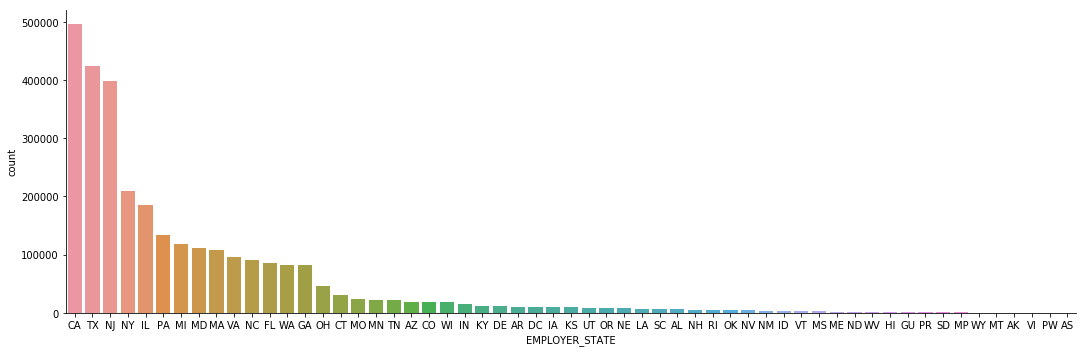

In [16]:
sns.catplot(x='EMPLOYER_STATE',kind = 'count', data = h1b, aspect = 3, order = h1b['EMPLOYER_STATE'].value_counts().index)

## Top 10 States

In [0]:
h1b['countvar'] = 1

In [0]:
states = h1b.groupby('EMPLOYER_STATE',as_index=False).count()[['EMPLOYER_STATE','countvar']].sort_values('countvar',ascending=False)

In [0]:
top10states = states.head(10)

Text(0.5, 1.0, 'Top 10 States')

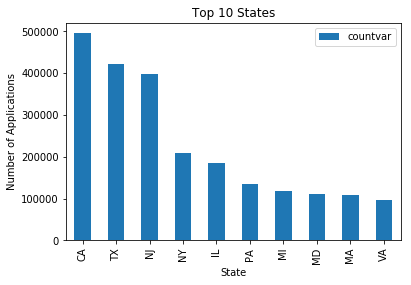

In [20]:
top10states.plot(x='EMPLOYER_STATE', y='countvar', kind='bar')
        
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.title('Top 10 States')

## Number of Applicaitons by State

In [0]:
plotly.tools.set_credentials_file(username='SherryYang', 
                                  api_key='q89aWuxUlGizzGKjX0KN')

In [22]:
data=[dict(
    type='choropleth',
    locations = states.EMPLOYER_STATE,
    z = states.countvar,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2014 - 2018 H1B VISA APPLICATIONS (EMPLOYER STATE)",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
plotly.plotly.iplot(fig)

**2014**

In [0]:
df14['countv'] = 1

In [0]:
states14 = df14.groupby('EMPLOYER_STATE',as_index=False).count()[['EMPLOYER_STATE','countv']].sort_values('countv',ascending=False)

In [25]:
data=[dict(
    type='choropleth',
    locations = states14.EMPLOYER_STATE,
    z = states14.countv,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2014 H1B Visa Applications by State",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
plotly.plotly.iplot(fig)

**2018**

In [0]:
df18['countv'] = 1

In [0]:
states18 = df18.groupby('EMPLOYER_STATE',as_index=False).count()[['EMPLOYER_STATE','countv']].sort_values('countv',ascending=False)

In [28]:
data=[dict(
    type='choropleth',
    locations = states18.EMPLOYER_STATE,
    z = states18.countv,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2018 H1B Visa Applications by State",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
plotly.plotly.iplot(fig)

# Top 20 H-1B Sponsors

In [0]:
employer_name = h1b['EMPLOYER_NAME'].value_counts().index.tolist()
employer_petitions = h1b['EMPLOYER_NAME'].value_counts().tolist()
employer_petitions
h1b_employer = h1b['EMPLOYER_NAME'].value_counts().to_frame().head(20)
h1b_employer = h1b_employer.reset_index()
h1b_employer.columns = ['EMPLOYER_NAME','H1B_COUNT']

Text(0.5, 0, 'Number of Petitions (x1000)')

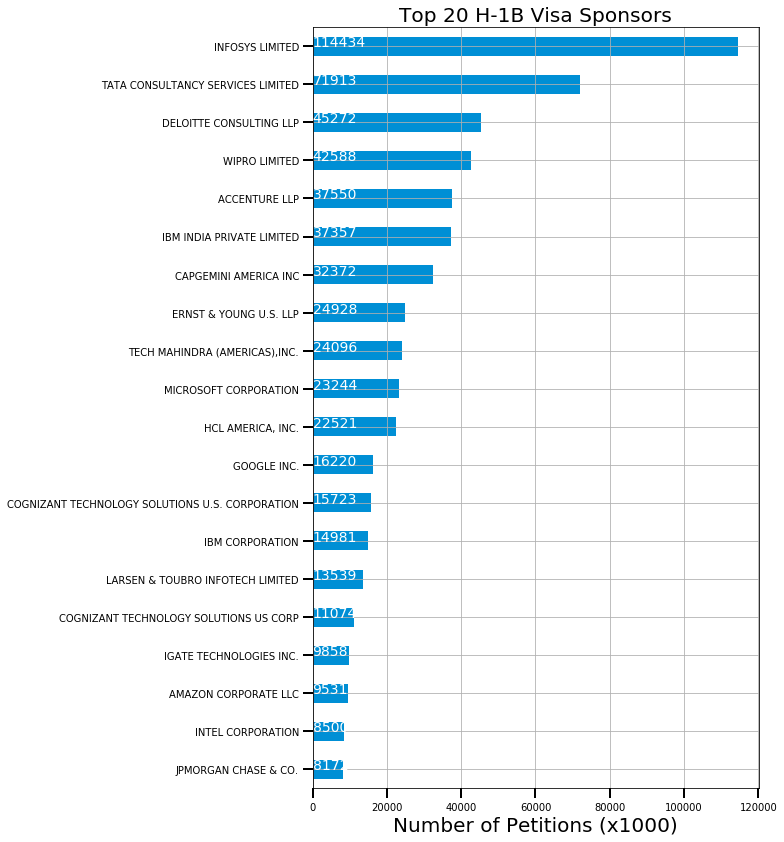

In [30]:
fig, ax = plt.subplots()# figsize=(8,4))
s = h1b_employer.set_index('EMPLOYER_NAME')['H1B_COUNT']
plt.style.use('fivethirtyeight')
ax = s.plot(kind='barh', figsize=(8, 14), 
            title='Top 20 H-1B Visa Sponsors')
for i, v in enumerate(h1b['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:20]): 
    ax.text(.7, i, v,fontsize=14,color='w')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.invert_yaxis()
ax.set_xlabel('Number of Petitions (x1000)',size=20)

**We found that "Cognizand Technology Solutions US Corp" and "Cognizand Technology Solutions U.S. Corporation" should be the same company but filed as different names per different years.**

## Number of certified and denied applications for Top employeers.

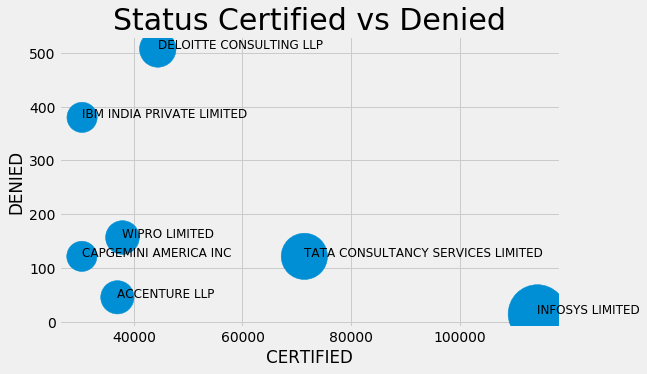

In [31]:
comp_den=h1b[h1b['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
comp_den=comp_den[comp_den['EMPLOYER_NAME'].isin(comp_den['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:7].index)]
comp_den=comp_den.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
comp_den=comp_den.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(8,5))
plt.scatter('CERTIFIED','DENIED',data=comp_den,s=comp_den['CERTIFIED']*0.03)
for i in range(comp_den.shape[0]):
    plt.text(comp_den['CERTIFIED'].values[i],comp_den['DENIED'].values[i],s=comp_den.index[i],fontsize=12,color='black')
plt.title('Status Certified vs Denied',size=30)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

# Case Status for All Years

**Certified**: Employer filed the Labor Condition Application(LCA), which was approved by DOL(US Department of Labor)

**Certified Withdrawn**: LCA was approved but later withdrawn by employer

**Withdrawn**: LCA was withdrawn by employer before approval

**Denied**: LCA was denied by DOL

Reasons for Certified Withdrawn:

LCA gets certified within 7 days if all the deatils provided is correct . So once LCA is certified and if your employer decides to withdraw . Then the status shows Certified-Withdrawn

Typically, a company will withdraw an H-1B petition when either the employee has been terminated, or the the employee has left the company. The process involves two steps. First, the Labor Condition Application is withdrawn — this step goes through the Department of Labor. 


Second, the company contacts United States Citizenship and Immigration Services, alerts them that the LCA has been withdrawn, and requests that the H-1B petition be withdrawn as well. 


Then, USCIS acknowledges receipt of the request and confirms that the H-1B petition has been withdrawn. The language USCIS provides is “the petition is automatically revoked as of the date of this notice because … the petitioner/employee has filed a written withdrawal of the petition"


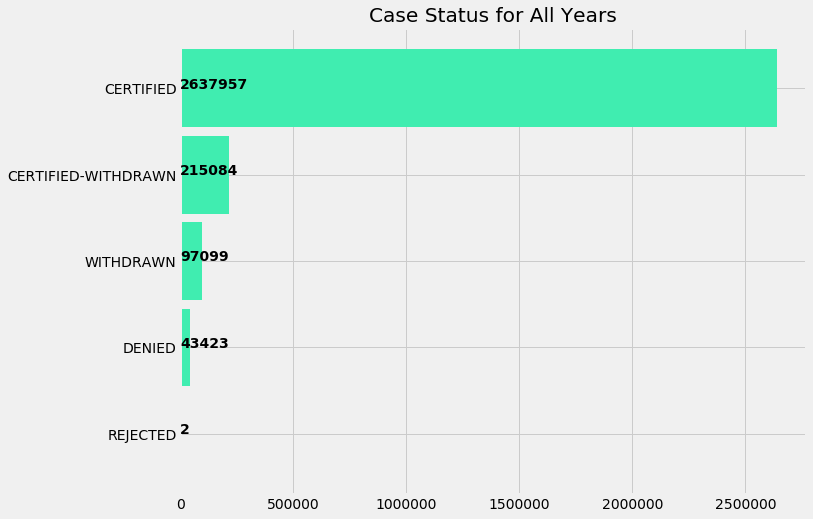

In [32]:
plt.figure(figsize=(10,8))
ax=h1b['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='#40edb0')
for i, v in enumerate(h1b['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=14,color='black',weight='bold')
plt.title('Case Status for All Years')
plt.show()

# Job Titles & Wage

## Top Job Titles

In [0]:
h1b['countjob'] = 1

In [0]:
jobs = h1b.groupby('SOC_NAME',as_index=False).count()[['SOC_NAME','countjob']].sort_values('countjob',ascending=False)

In [0]:
top10jobs = jobs.head(10)

Text(0.5, 1.0, 'Top 10 Titles')

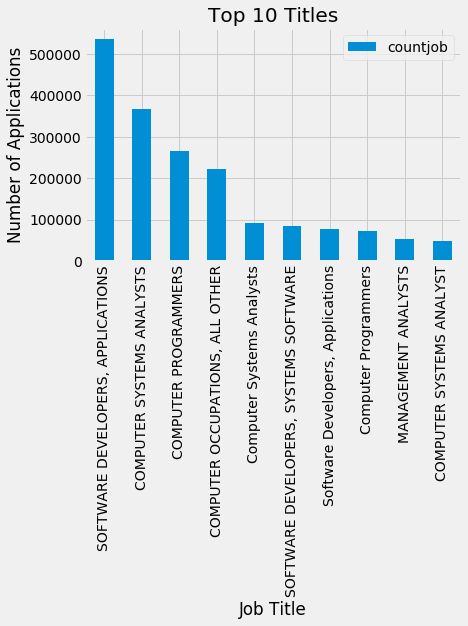

In [36]:
top10jobs.plot(x='SOC_NAME', y='countjob', kind='bar')
        
plt.xlabel('Job Title')
plt.ylabel('Number of Applications')
plt.title('Top 10 Titles')

## Wage Distribution

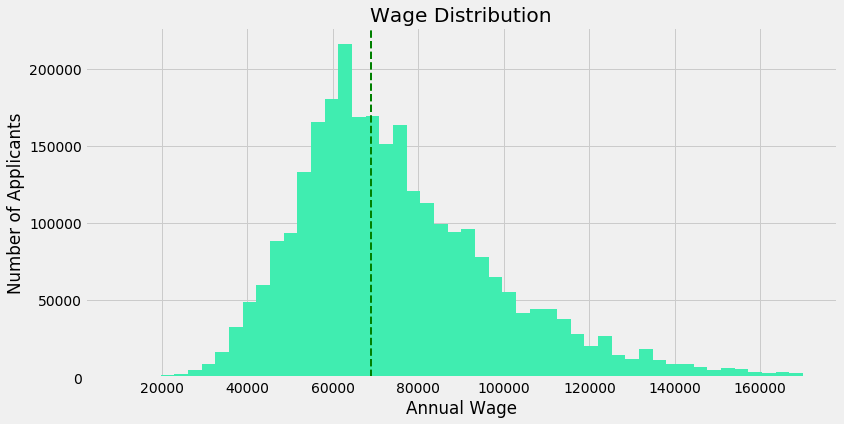

In [37]:
plt.figure(figsize=(12,6))
h1b.loc[(h1b.PREVAILING_WAGE<170000) & (h1b.PREVAILING_WAGE > 10000)].PREVAILING_WAGE.hist(bins=50,color='#40edb0')
plt.axvline(h1b[h1b['PREVAILING_WAGE']<=150000].PREVAILING_WAGE.median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Wage Distribution')
plt.xlabel('Annual Wage')
plt.ylabel('Number of Applicants')
plt.show()

## 2014 - 2018 H1B Median Wage by State**

In [0]:
stateswage = h1b.groupby('EMPLOYER_STATE',as_index=False).median()[['EMPLOYER_STATE','PREVAILING_WAGE']].sort_values('PREVAILING_WAGE',ascending=False)

In [39]:
data=[dict(
    type='choropleth',
    autocolorscale = True,
    locations = stateswage.EMPLOYER_STATE,
    z = stateswage.PREVAILING_WAGE,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2014 - 2018 H1B Median Wage by State",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
plotly.plotly.iplot(fig)

**2014**

In [0]:
stateswage14 = df14.groupby('EMPLOYER_STATE',as_index=False).median()[['EMPLOYER_STATE','PREVAILING_WAGE']].sort_values('PREVAILING_WAGE',ascending=False)

In [41]:
data=[dict(
    type='choropleth',
    autocolorscale = True,
    locations = stateswage14.EMPLOYER_STATE,
    z = stateswage14.PREVAILING_WAGE,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2014 H1B Median Wage by State",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
plotly.plotly.iplot(fig)


**2018**

In [0]:
stateswage18 = df18.groupby('EMPLOYER_STATE',as_index=False).median()[['EMPLOYER_STATE','PREVAILING_WAGE']].sort_values('PREVAILING_WAGE',ascending=False)

In [43]:
data=[dict(
    type='choropleth',
    autocolorscale = True,
    locations = stateswage18.EMPLOYER_STATE,
    z = stateswage18.PREVAILING_WAGE,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2018 H1B Median Wage by State",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
plotly.plotly.iplot(fig)


For example: California's median annual wage increased from 76.8k to 98.4k from 2014 to 2018, which is about 5.5% average increase every year. Massachusetts increased from 69.9k to 84.7k from 2014 to 2018, which is about 4% average increase every year.